In [ ]:
# Importações
import cv2
import numpy as np
import matplotlib.pyplot as plt


import os
import random
import concurrent.futures


from src.config import (
    NO_DISEASE_DIR, EFFUSION_DIR, 
    EFFUSION_PROCESSED_DIR, NO_DISEASE_PROCESSED_DIR,
    TRAIN_DIR, DATA_DIR
    )
from src.utils import (
    createDirectories, 
    splitImagesInTrainAndTest, 
    doRandomUndersampling
    )

In [4]:
# Verificando se há imagens duplicadas nos diretórios

effusion_images_array = np.array(
    list(map(
        lambda x: os.path.join(EFFUSION_DIR, x), 
        os.listdir(EFFUSION_DIR)
        ))
        )
no_disease_images_array = np.array(
    list(map(
        lambda x: os.path.join(NO_DISEASE_DIR, x),
        os.listdir(NO_DISEASE_DIR)
        ))
    )

_, effusion_images_count = np.unique(
    effusion_images_array, 
    return_counts=True
    )

_, no_disease_images_count = np.unique(
    no_disease_images_array,
    return_counts=True
)

print("Indices Imagens Repetidas (Effusion):", np.where(effusion_images_count != 1))
print("Indices Imagens Repetidas (No Disease):", np.where(no_disease_images_count != 1))

Indices Imagens Repetidas (Effusion): (array([], dtype=int64),)
Indices Imagens Repetidas (No Disease): (array([], dtype=int64),)


Verificaremos, a partir de técnicas de redução de ruído e de aumento de constraste, se conseguimos 'limpar' as imagens. Usaremos o filtro gaussiano para redução de ruído e equalização de histograma para aumento de contraste.

In [5]:
# Obtendo uma imagem aleatoriamente de cada classe

effusion_image =os.path.join(
        EFFUSION_DIR, 
        random.choice(os.listdir(EFFUSION_DIR))
        )

no_disease_image = os.path.join(
        NO_DISEASE_DIR, 
        random.choice(os.listdir(NO_DISEASE_DIR))
        )

([], [])

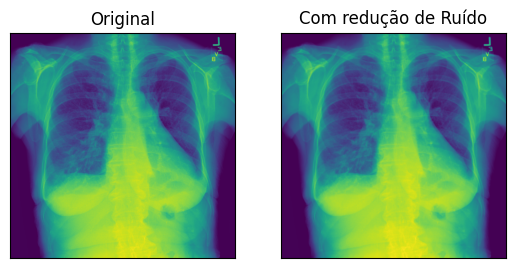

In [6]:
# Aplicando filtro gaussiano da imagem de 'effusion'

img = cv2.imread(effusion_image, cv2.IMREAD_GRAYSCALE)
filtered_img = cv2.GaussianBlur(img, (5, 5), 0)

plt.subplot(121)
plt.imshow(img)
plt.title("Original")
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(filtered_img)
plt.title("Com redução de Ruído")
plt.xticks([])
plt.yticks([])

([], [])

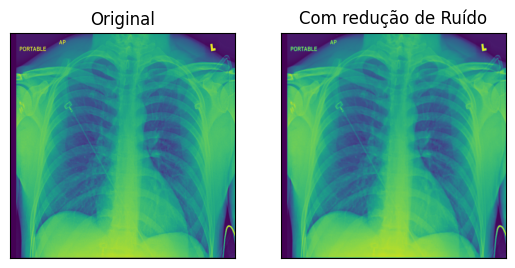

In [7]:
# Aplicando filtro gaussiano da imagem de 'no disease'

img = cv2.imread(no_disease_image, cv2.IMREAD_GRAYSCALE)
filtered_img = cv2.GaussianBlur(img, (5, 5), 0)

plt.subplot(121)
plt.imshow(img)
plt.title("Original")
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(filtered_img)
plt.title("Com redução de Ruído")
plt.xticks([])
plt.yticks([])

([], [])

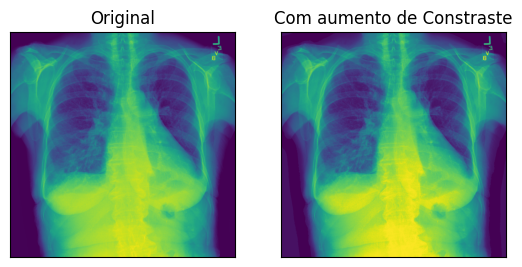

In [8]:
# Aplicando técnina de equalização de histograma na imagem de 'effusion'

img = cv2.imread(effusion_image, cv2.IMREAD_GRAYSCALE)
filtered_img = cv2.equalizeHist(img)

plt.subplot(121)
plt.imshow(img)
plt.title("Original")
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(filtered_img)
plt.title("Com aumento de Constraste")
plt.xticks([])
plt.yticks([])

([], [])

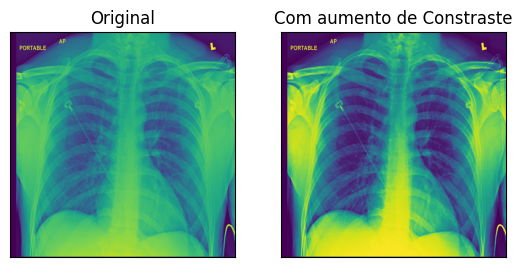

In [9]:
# Aplicando técnina de equalização de histograma na imagem de 'no disease'

img = cv2.imread(no_disease_image, cv2.IMREAD_GRAYSCALE)
filtered_img = cv2.equalizeHist(img)

plt.subplot(121)
plt.imshow(img)
plt.title("Original")
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(filtered_img)
plt.title("Com aumento de Constraste")
plt.xticks([])
plt.yticks([])

Percebemos que o filtro gaussiano não trouxe mudanças significativas, mas a equalização de histograma permitiu melhorar a visibilidade da imagem e, por consequência, da efusão. Portanto, iremos gerar novas imagens com essa técnica aplicada.

In [ ]:
# Criando os diretórios para as imagens pre-processadas

createDirectories(["effusion_processed", "no_finding_processed"], DATA_DIR)

In [ ]:
# Função para gerar a imagem processada

def processImageOnDirectory(image_path: str, dir_path: str) -> None:

    """Aplica equalização de histograma em 'image_path' e o salva em 'dir_path'

    Parameters
    ----------
    image_path : str
        Caminho da imagem a ser processada
    dir_path: str
        Caminho do diretório em que a imagem processada será armazenada
    """

    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    filtered_img = cv2.equalizeHist(img)

    basename = os.path.basename(image_path)

    cv2.imwrite(os.path.join(
        dir_path,
        basename
    ), filtered_img)


In [ ]:
# Adicionando as imagens processadas nos diretórios criados
with concurrent.futures.ThreadPoolExecutor(max_workers=4) as executor:

    executor.map(lambda x: processImageOnDirectory(x, EFFUSION_PROCESSED_DIR), effusion_images_array)
    executor.map(lambda x: processImageOnDirectory(x, NO_DISEASE_PROCESSED_DIR), no_disease_images_array)

In [ ]:
# Separando as imagens em treino e teste

splitImagesInTrainAndTest(
    EFFUSION_PROCESSED_DIR, 
    test_size=0.3
    )
splitImagesInTrainAndTest(
    NO_DISEASE_PROCESSED_DIR, 
    test_size=0.3
    )

In [ ]:
# Balanceando a base de treino

dropped_images_path = os.path.join(
    DATA_DIR, 
    "dropped_images"
    )

doRandomUndersampling(TRAIN_DIR, dropped_images_path)